In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
car_ = pd.read_csv("car_evaluation.csv",header=None)
car_.columns = ["Buying Price","Maintenance Cost","Doors","Persons","Lug_Boot","Safety","Decision"]
car_.head()

,Buying Price,Maintenance Cost,Doors,Persons,Lug_Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Getting dataset information
car_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buying Price      1728 non-null   object
 1   Maintenance Cost  1728 non-null   object
 2   Doors             1728 non-null   object
 3   Persons           1728 non-null   object
 4   Lug_Boot          1728 non-null   object
 5   Safety            1728 non-null   object
 6   Decision          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
# Checking number of unique values for each column
for col in car_.columns:
 print(col)
 print()
 print(car_[col].value_counts())

Buying Price

high     432
low      432
med      432
vhigh    432
Name: Buying Price, dtype: int64
Maintenance Cost

high     432
low      432
med      432
vhigh    432
Name: Maintenance Cost, dtype: int64
Doors

3        432
5more    432
2        432
4        432
Name: Doors, dtype: int64
Persons

more    576
2       576
4       576
Name: Persons, dtype: int64
Lug_Boot

med      576
small    576
big      576
Name: Lug_Boot, dtype: int64
Safety

high    576
low     576
med     576
Name: Safety, dtype: int64
Decision

unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64


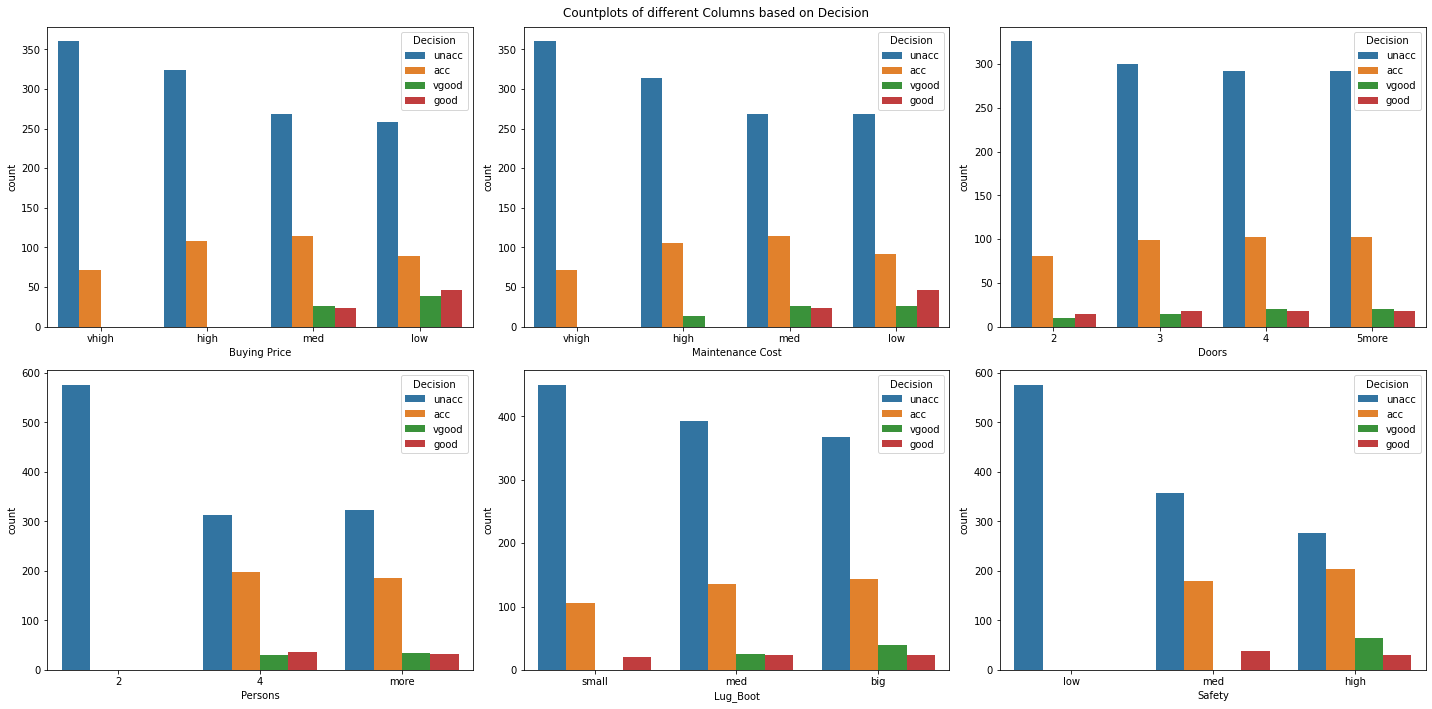

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
for r in range(6):
    i = r//3
    j = r%3
    sns.countplot(x=car_.columns[r],data=car_,hue='Decision',ax=axes[i][j])
fig.suptitle("Countplots of different Columns based on Decision")
fig.tight_layout()

# Encoding the categorical variables

In [7]:
encode1 = {'vhigh':3,'high':2,'med':1,'low':0}
encode2 = {'2':0,'3':1,'4':2,'5more':3}
encode3 = {'2':0,'4':1,'more':2}
encode4 = {'small':0,'med':1,'big':2}
encode5 = {'unacc':0,'acc':1,'good':2,'vgood':3}


In [8]:
car_['Buying Price'] = car_['Buying Price'].apply(lambda bp:encode1[bp])
car_['Maintenance Cost'] = car_['Maintenance Cost'].apply(lambda mtc:encode1[mtc])
car_['Doors'] = car_['Doors'].apply(lambda d:encode2[d])
car_['Persons'] = car_['Persons'].apply(lambda p:encode3[p])
car_['Lug_Boot'] = car_['Lug_Boot'].apply(lambda lb:encode4[lb])
car_['Safety'] = car_['Safety'].apply(lambda s:encode1[s])
car_['Decision'] = car_['Decision'].apply(lambda d:encode5[d])

In [9]:
car_.head()

,Buying Price,Maintenance Cost,Doors,Persons,Lug_Boot,Safety,Decision
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


# Train-test split


In [10]:
from sklearn.model_selection import train_test_split
X = car_.drop('Decision',axis=1)
y = car_['Decision']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
X_train.shape

(1209, 6)

In [12]:
X_test.shape

(519, 6)

In [13]:
y_train.shape


(1209,)

In [14]:
y_test.shape

(519,)

# Training the Random Forest Classifier

In [15]:
# Initialising and training the model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# Getting training and test score
print("Training Score = {:.3f}".format(rfc.score(X_train,y_train)))
print("Test Score = {:.3f}".format(rfc.score(X_test,y_test)))

Training Score = 1.000
Test Score = 0.973


In [16]:
print("Model performance on training data\n")
print(confusion_matrix(y_train,rfc.predict(X_train)))
print(classification_report(y_train,rfc.predict(X_train)))

Model performance on training data

[[836   0   0   0]
 [  0 276   0   0]
 [  0   0  48   0]
 [  0   0   0  49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        49

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [17]:
# Getting predictions
rfc_predictions = rfc.predict(X_test)
print("Model performance on test data\n")
print(confusion_matrix(y_test,rfc_predictions))
print(classification_report(y_test,rfc_predictions))

Model performance on test data

[[367   4   3   0]
 [  1 104   3   0]
 [  0   1  19   1]
 [  0   1   0  15]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       374
           1       0.95      0.96      0.95       108
           2       0.76      0.90      0.83        21
           3       0.94      0.94      0.94        16

    accuracy                           0.97       519
   macro avg       0.91      0.95      0.93       519
weighted avg       0.98      0.97      0.97       519



# Visualising the feature scores


In [18]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Safety              0.306544
Persons             0.242110
Maintenance Cost    0.157265
Buying Price        0.153123
Lug_Boot            0.084079
Doors               0.056880
dtype: float64

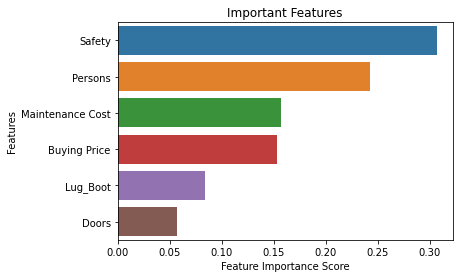

In [19]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

# END